In [140]:
import localgraphclustering as lgc
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Load the Senate Data and look at Triangle weighting there.

In [171]:
g=lgc.GraphLocal()
g.read_graph(
       "datasets/senate.edgelist",
    separator= " ")
xy = np.loadtxt("datasets/senate.xy")
g._num_vertices

8974

In [172]:
ncp = lgc.NCPData(g)
# default settings 
ncp.approxPageRank(nthreads=2,timeout=120) # this takes <= 2 mins ... 

There are  1  connected components in the graph


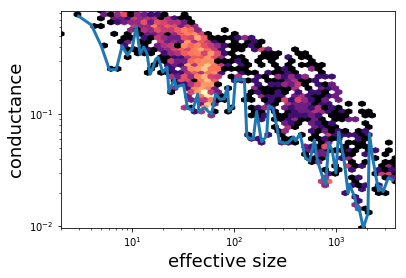

In [145]:
p = lgc.NCPPlots(ncp)
p.cond_by_size();

In [ ]:
p = lgc.NCPPlots(ncp)
p.cond_by_size_itrv();

## Form the triangle-weighted adjacency matrix W

In [146]:
A = g.adjacency_matrix
W = np.dot(A,A).multiply(A)
print(np.sum(W))
W.eliminate_zeros()

8745556.0


In [147]:
""" I've been meaning to put this into the class... """
def from_adjacency(A):
    # TODO Verify input 
    rval = lgc.GraphLocal()
    rval.adjacency_matrix = A
    rval._num_vertices = A.shape[0]

    rval._weighted = False
    for i in rval.adjacency_matrix.data:
        if i != 1:
            rval._weighted = True
            break
            
    vtype = np.uint32
    itype = np.uint32
     
    rval._num_edges = rval.adjacency_matrix.nnz
    rval.compute_statistics()
    rval.ai = itype(rval.adjacency_matrix.indptr)
    rval.aj = vtype(rval.adjacency_matrix.indices)
    return rval
w = from_adjacency(W)

There are  1  connected components in the graph


In [151]:
# low-level interface. 
ncpW = lgc.NCPData(w)
ncpW.add_random_neighborhood_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted"),
    timeout=20,
    nthreads=2)
ncpW.add_random_node_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted"),
    timeout=20,
    nthreads=2)
ncpW.add_random_node_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted", rho=1e-6),
    timeout=20,
    nthreads=2)

There are  1  connected components in the graph


/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/approximate_PageRank.py:119: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/approximate_PageRank.py:119: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dglei

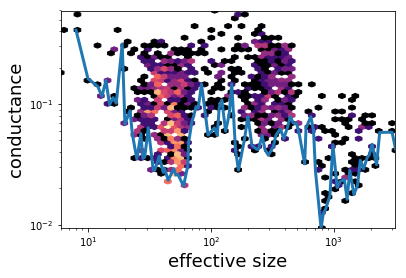

In [152]:
p = lgc.NCPPlots(ncpW)
p.cond_by_size();

In [154]:
## Compare conductance between the graphs
Wcond = []
Gcond = []
for i in range(len(ncpW.results)):
    S,cond = ncpW.output_set(i)
    Wcond.append(cond)
    Gcond.append(g.set_scores(S)["cond"])

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/approximate_PageRank.py:119: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



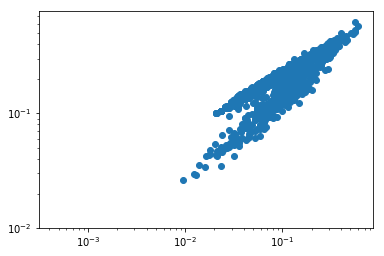

In [159]:
plt.scatter(Wcond,Gcond)
plt.xscale("log")
plt.yscale("log")

## Now test the ppi dataset. 

(Of course, if you were doing this outside a demo, you should make a function to make sure that all the processing and changes are applied the same way to both graphs ...)

In [160]:
g=lgc.GraphLocal()
g.read_graph(
       "datasets/ppi-homo.edgelist",
    separator= " ", header=True)
g._num_vertices

8887

There are  1  connected components in the graph


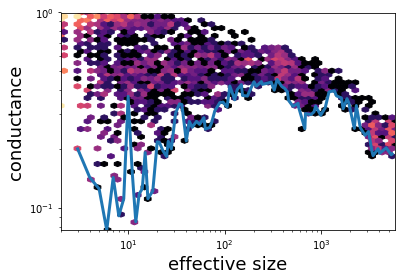

In [161]:
ncp = lgc.NCPData(g)
# default settings 
ncp.approxPageRank(nthreads=2,timeout=120) # this takes <= 2 mins ... 
p = lgc.NCPPlots(ncp)
p.cond_by_size();

In [162]:
A = g.adjacency_matrix
W = np.dot(A,A).multiply(A)
print(np.sum(W))
W.eliminate_zeros()
w = from_adjacency(W)

169056.0


In [163]:
# low-level interface. 
ncpW = lgc.NCPData(w)
ncpW.add_random_neighborhood_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted"),
    timeout=20,p
    nthreads=2)
ncpW.add_random_node_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted"),
    timeout=20,
    nthreads=2)
ncpW.add_random_node_samples(
    method=lgc.partialfunc(
        lgc.spectral_clustering,method="acl_weighted", rho=1e-6),
    timeout=20,
    nthreads=2)

There are  5025  connected components in the graph


/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/GraphLocal.py:552: UserWarning:

The graph has multiple (5025) components, using the largest with 3783 / 8887 nodes

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/approximate_PageRank.py:119: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/loca

Text(0.5, 1.0, 'Original graph')

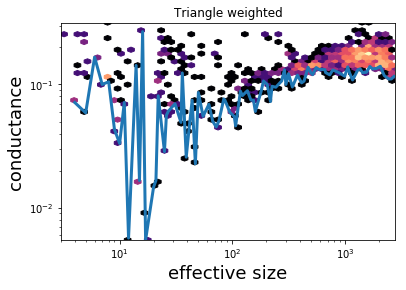

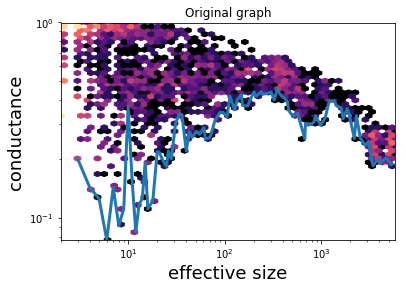

In [168]:
p = lgc.NCPPlots(ncpW)
p.cond_by_size();
plt.title("Triangle weighted")
p = lgc.NCPPlots(ncp).cond_by_size();
plt.title("Original graph")

In [166]:
## Compare conductance between the graphs
Wcond = []
Gcond = []
for i in range(len(ncpW.results)):
    S,cond = ncpW.output_set(i)
    Wcond.append(cond)
    Gcond.append(g.set_scores(S)["cond"])


/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/spectral_clustering.py:95: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.

/Users/dgleich/Library/Python/3.7/lib/python/site-packages/localgraphclustering/approximate_PageRank.py:119: UserWarning:

The weights of the graph will be discarded. Use approximate_PageRank_weighted instead if you want to keep the edge weights.



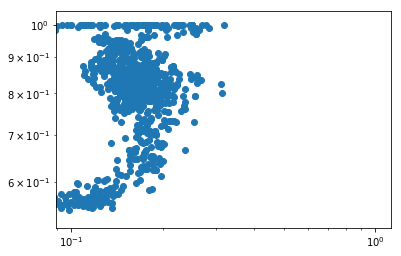

In [167]:
plt.scatter(Wcond,Gcond)
plt.xscale("log")
plt.yscale("log")